In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

In [3]:
metadata = dict(title='Orbit', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)

In [4]:
#Functions in Case Orbital Velocity and Semi-Major Axis Need to be defined from transit data
#T = orbital period 
#used to define orbital velocity
def velocity(a, T):
    w = (2 * np.pi * a)/T
    return w


#M = mass star
#m = mass planet
#a = semi-major axis
def kepler(T, M):
    G = 6.67408e-11 #m3 kg-1 s-2
    a = ((G * (T**2) * (M))/(4 * (np.pi**2)))**1/3
    return a

In [5]:
#Data Frame to input initial Parameters
#Can change total number of objects, mass, and initial position and velocity
data = {'Mass': [2.0685e30, 2.1690176e27, 4.0800914e25, 7.8260292e25, 2.4872e27], 
    'Position':[[0,0,0], [7.779089e9, 0,0], [2.588043e9, 0,0], [1.31646e10, 0,0], [2.1093e11, 0,0]],
    'Velocity':[[0,0,0], [0,velocity(7.779089e9, 359348.73696),0], [0,velocity(2.588043e9, 68220.7488),0], [0,velocity(1.31646e10, 780258.528),0], [0,velocity(2.1093e11, 5.149e7),0]]}
bodies = pd.DataFrame(data=data) #make sure initial conditions match up for velocity and position
bodies                 

,Mass,Position,Velocity
0,2.068500e+30,"[0, 0, 0]","[0, 0, 0]"
1,2.169018e+27,"[7779089000.0, 0, 0]","[0, 136016.7789138021, 0]"
2,4.080091e+25,"[2588043000.0, 0, 0]","[0, 238360.82186111945, 0]"
3,7.826029e+25,"[13164600000.0, 0, 0]","[0, 106010.53154384282, 0]"
4,2.487200e+27,"[210930000000.0, 0, 0]","[0, 25739.21687402195, 0]"


In [6]:
#Define Position/Velocity Array from initial conditions
y_pos = np.concatenate(bodies['Position'])
y_vel = np.concatenate(bodies['Velocity'])
y = np.zeros((len(y_pos))+(len(y_vel)))
for i in range(len(y_pos)):
    y[i] = y_pos[i]
    y[i + len(y_pos)] = y_vel[i]

In [7]:
y

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.77908900e+09,
       0.00000000e+00, 0.00000000e+00, 2.58804300e+09, 0.00000000e+00,
       0.00000000e+00, 1.31646000e+10, 0.00000000e+00, 0.00000000e+00,
       2.10930000e+11, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.36016779e+05,
       0.00000000e+00, 0.00000000e+00, 2.38360822e+05, 0.00000000e+00,
       0.00000000e+00, 1.06010532e+05, 0.00000000e+00, 0.00000000e+00,
       2.57392169e+04, 0.00000000e+00])

In [8]:
def time_step_movement(dt,y): 
    #Function to update postion and velocity at each time-step
    global G #Gravitational Constant
    
    if len(y) == 12:
        #pull out postion and velocity
        r_1 = y[0:3]
        r_2 = y[3:6]
        v_1 = y[6:9]
        v_2 = y[9:12]
        
        #Define Forces from Newton's Law of Gravitation
        F1 = -bodies['Mass'][0]*bodies['Mass'][1]*G*(r_1-r_2)/np.linalg.norm(r_1-r_2)**3 
        F2 = -bodies['Mass'][1]*bodies['Mass'][0]*G*(r_2-r_1)/np.linalg.norm(r_2-r_1)**3
        #Define Acceleration of bodies
        acc1 = F1/bodies['Mass'][0]
        acc2 = F2/bodies['Mass'][1]
        
        v1 = []
        v2 = []
        r1 = []
        r2 = []
        for i in range(len(acc1)):
            #update velocity over time-step
            v_1_new = acc1[i] * dt + v_1[i]
            v_2_new = acc2[i] * dt + v_2[i]
            v1 = np.append(v1, v_1_new)
            v2 = np.append(v2, v_2_new)
            
            #update position over time-step
            r_1_new = v1[i] * dt + r_1[i]
            r_2_new = v2[i] * dt + r_2[i]
            r1 = np.append(r1, r_1_new)
            r2 = np.append(r2, r_2_new)
            
        #return updated Postition/Velocity array    
        return np.concatenate((r1, r2, v1, v2))
    elif len(y) == 18:
        #pull out postion and velocity
        r_1 = y[0:3]
        r_2 = y[3:6]
        r_3 = y[6:9]
        v_1 = y[9:12]
        v_2 = y[12:15]
        v_3 = y[15:18]
        
        #Define Forces from Newton's Law of Gravitation
        F1=-bodies['Mass'][0]*bodies['Mass'][1]*G*(r_1-r_2)/np.linalg.norm(r_1-r_2)**3 
        + -bodies['Mass'][0]*bodies['Mass'][2]*G*(r_1-r_3)/np.linalg.norm(r_1-r_3)**3 
        F2=-bodies['Mass'][1]*bodies['Mass'][0]*G*(r_2-r_1)/np.linalg.norm(r_2-r_1)**3 
        + -bodies['Mass'][1]*bodies['Mass'][2]*G*(r_2-r_3)/np.linalg.norm(r_2-r_3)**3
        F3=-bodies['Mass'][2]*bodies['Mass'][0]*G*(r_3-r_1)/np.linalg.norm(r_3-r_1)**3 
        + -bodies['Mass'][2]*bodies['Mass'][1]*G*(r_3-r_2)/np.linalg.norm(r_3-r_2)**3 
        #Define Acceleration of bodies
        acc1 = F1/bodies['Mass'][0]
        acc2 = F2/bodies['Mass'][1]
        acc3 = F3/bodies['Mass'][2]
    
        v1 = []
        v2 = []
        v3 = []
        r1 = []
        r2 = []
        r3 = []
        for i in range(len(acc1)):
            #update velocity over time-step
            v_1_new = acc1[i] * dt + v_1[i]
            v_2_new = acc2[i] * dt + v_2[i]
            v_3_new = acc3[i] * dt + v_3[i]
            v1 = np.append(v1, v_1_new)
            v2 = np.append(v2, v_2_new)
            v3 = np.append(v3, v_3_new)
            
            #update position over time-step
            r_1_new = v1[i] * dt + r_1[i]
            r_2_new = v2[i] * dt + r_2[i]
            r_3_new = v3[i] * dt + r_3[i]
            r1 = np.append(r1, r_1_new)
            r2 = np.append(r2, r_2_new)
            r3 = np.append(r3, r_3_new)
        
        #return updated Postition/Velocity array 
        return np.concatenate((r1, r2, r3, v1, v2, v3))
    elif len(y) == 24:
        #pull out postion and velocity
        r_1 = y[0:3]
        r_2 = y[3:6]
        r_3 = y[6:9]
        r_4 = y[9:12]
        v_1 = y[12:15]
        v_2 = y[15:18]
        v_3 = y[18:21]
        v_4 = y[21:24]
        
        #Define Forces from Newton's Law of Gravitation
        F1=-bodies['Mass'][0]*bodies['Mass'][1]*G*(r_1-r_2)/np.linalg.norm(r_1-r_2)**3 
        + -bodies['Mass'][0]*bodies['Mass'][2]*G*(r_1-r_3)/np.linalg.norm(r_1-r_3)**3 
        + -bodies['Mass'][0]*bodies['Mass'][3]*G*(r_1-r_4)/np.linalg.norm(r_1-r_4)**3
        F2=-bodies['Mass'][1]*bodies['Mass'][0]*G*(r_2-r_1)/np.linalg.norm(r_2-r_1)**3 
        + -bodies['Mass'][1]*bodies['Mass'][2]*G*(r_2-r_3)/np.linalg.norm(r_2-r_3)**3 
        + -bodies['Mass'][1]*bodies['Mass'][3]*G*(r_2-r_4)/np.linalg.norm(r_2-r_4)**3
        F3=-bodies['Mass'][2]*bodies['Mass'][0]*G*(r_3-r_1)/np.linalg.norm(r_3-r_1)**3 
        + -bodies['Mass'][2]*bodies['Mass'][1]*G*(r_3-r_2)/np.linalg.norm(r_3-r_2)**3 
        + -bodies['Mass'][2]*bodies['Mass'][3]*G*(r_3-r_4)/np.linalg.norm(r_3-r_4)**3
        F4=-bodies['Mass'][3]*bodies['Mass'][0]*G*(r_4-r_1)/np.linalg.norm(r_4-r_1)**3 
        + -bodies['Mass'][3]*bodies['Mass'][1]*G*(r_4-r_2)/np.linalg.norm(r_4-r_2)**3 
        + -bodies['Mass'][3]*bodies['Mass'][2]*G*(r_4-r_3)/np.linalg.norm(r_4-r_3)**3
        #Define Acceleration of bodies
        acc1 = F1/bodies['Mass'][0]
        acc2 = F2/bodies['Mass'][1]
        acc3 = F3/bodies['Mass'][2]
        acc4 = F4/bodies['Mass'][3]
    
        
        v1 = []
        v2 = []
        v3 = []
        v4 = []
        r1 = []
        r2 = []
        r3 = []
        r4 = []
        for i in range(len(acc1)):
            #update velocity over time-step
            v_1_new = acc1[i] * dt + v_1[i]
            v_2_new = acc2[i] * dt + v_2[i]
            v_3_new = acc3[i] * dt + v_3[i]
            v_4_new = acc4[i] * dt + v_4[i]
            v1 = np.append(v1, v_1_new)
            v2 = np.append(v2, v_2_new)
            v3 = np.append(v3, v_3_new)
            v4 = np.append(v4, v_4_new)
            
            #update position over time-step
            r_1_new = v1[i] * dt + r_1[i]
            r_2_new = v2[i] * dt + r_2[i]
            r_3_new = v3[i] * dt + r_3[i]
            r_4_new = v4[i] * dt + r_4[i]
            r1 = np.append(r1, r_1_new)
            r2 = np.append(r2, r_2_new)
            r3 = np.append(r3, r_3_new)
            r4 = np.append(r4, r_4_new)
        
        #return updated Postition/Velocity array 
        return np.concatenate((r1, r2, r3, r4, v1, v2, v3, v4))
    elif len(y) == 30:
        #pull out postion and velocity
        r_1 = y[0:3]
        r_2 = y[3:6]
        r_3 = y[6:9]
        r_4 = y[9:12]
        r_5 = y[12:15]
        v_1 = y[15:18]
        v_2 = y[18:21]
        v_3 = y[21:24]
        v_4 = y[24:27]
        v_5 = y[27:30]
        
        #Define Forces from Newton's Law of Gravitation
        F1=-bodies['Mass'][0]*bodies['Mass'][1]*G*(r_1-r_2)/np.linalg.norm(r_1-r_2)**3
        + -bodies['Mass'][0]*bodies['Mass'][2]*G*(r_1-r_3)/np.linalg.norm(r_1-r_3)**3
        + -bodies['Mass'][0]*bodies['Mass'][3]*G*(r_1-r_4)/np.linalg.norm(r_1-r_4)**3 
        + -bodies['Mass'][0]*bodies['Mass'][4]*G*(r_1-r_5)/np.linalg.norm(r_1-r_5)**3
        F2=-bodies['Mass'][1]*bodies['Mass'][0]*G*(r_2-r_1)/np.linalg.norm(r_2-r_1)**3 
        + -bodies['Mass'][1]*bodies['Mass'][2]*G*(r_2-r_3)/np.linalg.norm(r_2-r_3)**3 
        + -bodies['Mass'][1]*bodies['Mass'][3]*G*(r_2-r_4)/np.linalg.norm(r_2-r_4)**3 
        + -bodies['Mass'][1]*bodies['Mass'][4]*G*(r_2-r_5)/np.linalg.norm(r_2-r_5)**3
        F3=-bodies['Mass'][2]*bodies['Mass'][0]*G*(r_3-r_1)/np.linalg.norm(r_3-r_1)**3 
        + -bodies['Mass'][2]*bodies['Mass'][1]*G*(r_3-r_2)/np.linalg.norm(r_3-r_2)**3 
        + -bodies['Mass'][2]*bodies['Mass'][3]*G*(r_3-r_4)/np.linalg.norm(r_3-r_4)**3 
        + -bodies['Mass'][2]*bodies['Mass'][4]*G*(r_3-r_5)/np.linalg.norm(r_3-r_5)**3
        F4=-bodies['Mass'][3]*bodies['Mass'][0]*G*(r_4-r_1)/np.linalg.norm(r_4-r_1)**3 
        + -bodies['Mass'][3]*bodies['Mass'][1]*G*(r_4-r_2)/np.linalg.norm(r_4-r_2)**3 
        + -bodies['Mass'][3]*bodies['Mass'][2]*G*(r_4-r_3)/np.linalg.norm(r_4-r_3)**3 
        + -bodies['Mass'][3]*bodies['Mass'][4]*G*(r_4-r_5)/np.linalg.norm(r_4-r_5)**3
        F5=-bodies['Mass'][4]*bodies['Mass'][0]*G*(r_5-r_1)/np.linalg.norm(r_5-r_1)**3 
        + -bodies['Mass'][4]*bodies['Mass'][1]*G*(r_5-r_2)/np.linalg.norm(r_5-r_2)**3 
        + -bodies['Mass'][4]*bodies['Mass'][2]*G*(r_5-r_3)/np.linalg.norm(r_5-r_3)**3 
        + -bodies['Mass'][4]*bodies['Mass'][3]*G*(r_5-r_4)/np.linalg.norm(r_5-r_4)**3
        #Define Acceleration of bodies
        acc1 = F1/bodies['Mass'][0]
        acc2 = F2/bodies['Mass'][1]
        acc3 = F3/bodies['Mass'][2]
        acc4 = F4/bodies['Mass'][3]
        acc5 = F5/bodies['Mass'][4]
    
        v1 = []
        v2 = []
        v3 = []
        v4 = []
        v5 = []
        r1 = []
        r2 = []
        r3 = []
        r4 = []
        r5 = []
        for i in range(len(acc1)):
            #update velocity over time-step
            v_1_new = acc1[i] * dt + v_1[i]
            v_2_new = acc2[i] * dt + v_2[i]
            v_3_new = acc3[i] * dt + v_3[i]
            v_4_new = acc4[i] * dt + v_4[i]
            v_5_new = acc5[i] * dt + v_5[i]
            v1 = np.append(v1, v_1_new)
            v2 = np.append(v2, v_2_new)
            v3 = np.append(v3, v_3_new)
            v4 = np.append(v4, v_4_new)
            v5 = np.append(v5, v_5_new)
            
            #update position over time-step
            r_1_new = v1[i] * dt + r_1[i]
            r_2_new = v2[i] * dt + r_2[i]
            r_3_new = v3[i] * dt + r_3[i]
            r_4_new = v4[i] * dt + r_4[i]
            r_5_new = v5[i] * dt + r_5[i]
            r1 = np.append(r1, r_1_new)
            r2 = np.append(r2, r_2_new)
            r3 = np.append(r3, r_3_new)
            r4 = np.append(r4, r_4_new)
            r5 = np.append(r5, r_5_new)
        
        #return updated Postition/Velocity array 
        return np.concatenate((r1, r2, r3, r4, r5, v1, v2, v3, v4, v5))
    elif len(y) == 36:
        #pull out postion and velocity
        r_1 = y[0:3]
        r_2 = y[3:6]
        r_3 = y[6:9]
        r_4 = y[9:12]
        r_5 = y[12:15]
        r_6 = y[15:18]
        v_1 = y[18:21]
        v_2 = y[21:24]
        v_3 = y[24:27]
        v_4 = y[27:30]
        v_5 = y[30:33]
        v_6 = y[33:36]
        
        #Define Forces from Newton's Law of Gravitation
        F1=-bodies['Mass'][0]*bodies['Mass'][1]*G*(r_1-r_2)/np.linalg.norm(r_1-r_2)**3 
        + -bodies['Mass'][0]*bodies['Mass'][2]*G*(r_1-r_3)/np.linalg.norm(r_1-r_3)**3 
        + -bodies['Mass'][0]*bodies['Mass'][3]*G*(r_1-r_4)/np.linalg.norm(r_1-r_4)**3 
        + -bodies['Mass'][0]*bodies['Mass'][4]*G*(r_1-r_5)/np.linalg.norm(r_1-r_5)**3 
        + -bodies['Mass'][0]*bodies['Mass'][5]*G*(r_1-r_6)/np.linalg.norm(r_1-r_6)**3
        F2=-bodies['Mass'][1]*bodies['Mass'][0]*G*(r_2-r_1)/np.linalg.norm(r_2-r_1)**3 
        + -bodies['Mass'][1]*bodies['Mass'][2]*G*(r_2-r_3)/np.linalg.norm(r_2-r_3)**3 
        + -bodies['Mass'][1]*bodies['Mass'][3]*G*(r_2-r_4)/np.linalg.norm(r_2-r_4)**3 
        + -bodies['Mass'][1]*bodies['Mass'][4]*G*(r_2-r_5)/np.linalg.norm(r_2-r_5)**3 
        + -bodies['Mass'][1]*bodies['Mass'][5]*G*(r_2-r_6)/np.linalg.norm(r_2-r_6)**3
        F3=-bodies['Mass'][2]*bodies['Mass'][0]*G*(r_3-r_1)/np.linalg.norm(r_3-r_1)**3 
        + -bodies['Mass'][2]*bodies['Mass'][1]*G*(r_3-r_2)/np.linalg.norm(r_3-r_2)**3 
        + -bodies['Mass'][2]*bodies['Mass'][3]*G*(r_3-r_4)/np.linalg.norm(r_3-r_4)**3 
        + -bodies['Mass'][2]*bodies['Mass'][4]*G*(r_3-r_5)/np.linalg.norm(r_3-r_5)**3 
        + -bodies['Mass'][2]*bodies['Mass'][5]*G*(r_3-r_6)/np.linalg.norm(r_3-r_6)**3
        F4=-bodies['Mass'][3]*bodies['Mass'][0]*G*(r_4-r_1)/np.linalg.norm(r_4-r_1)**3 
        + -bodies['Mass'][3]*bodies['Mass'][1]*G*(r_4-r_2)/np.linalg.norm(r_4-r_2)**3 
        + -bodies['Mass'][3]*bodies['Mass'][2]*G*(r_4-r_3)/np.linalg.norm(r_4-r_3)**3 
        + -bodies['Mass'][3]*bodies['Mass'][4]*G*(r_4-r_5)/np.linalg.norm(r_4-r_5)**3 
        + -bodies['Mass'][3]*bodies['Mass'][5]*G*(r_4-r_6)/np.linalg.norm(r_4-r_6)**3
        F5=-bodies['Mass'][4]*bodies['Mass'][0]*G*(r_5-r_1)/np.linalg.norm(r_5-r_1)**3 
        + -bodies['Mass'][4]*bodies['Mass'][1]*G*(r_5-r_2)/np.linalg.norm(r_5-r_2)**3 
        + -bodies['Mass'][4]*bodies['Mass'][2]*G*(r_5-r_3)/np.linalg.norm(r_5-r_3)**3 
        + -bodies['Mass'][4]*bodies['Mass'][3]*G*(r_5-r_4)/np.linalg.norm(r_5-r_4)**3 
        + -bodies['Mass'][4]*bodies['Mass'][5]*G*(r_5-r_6)/np.linalg.norm(r_5-r_6)**3
        F6=-bodies['Mass'][5]*bodies['Mass'][0]*G*(r_6-r_1)/np.linalg.norm(r_6-r_1)**3 
        + -bodies['Mass'][5]*bodies['Mass'][1]*G*(r_6-r_2)/np.linalg.norm(r_6-r_2)**3 
        + -bodies['Mass'][5]*bodies['Mass'][2]*G*(r_6-r_3)/np.linalg.norm(r_6-r_3)**3 
        + -bodies['Mass'][5]*bodies['Mass'][3]*G*(r_6-r_4)/np.linalg.norm(r_6-r_4)**3 
        + -bodies['Mass'][5]*bodies['Mass'][4]*G*(r_6-r_5)/np.linalg.norm(r_6-r_5)**3
        #Define Acceleration of bodies
        acc1 = F1/bodies['Mass'][0]
        acc2 = F2/bodies['Mass'][1]
        acc3 = F3/bodies['Mass'][2]
        acc4 = F4/bodies['Mass'][3]
        acc5 = F5/bodies['Mass'][4]
        acc6 = F6/bodies['Mass'][5]
        
        v1 = []
        v2 = []
        v3 = []
        v4 = []
        v5 = []
        v6 = []
        r1 = []
        r2 = []
        r3 = []
        r4 = []
        r5 = []
        r6 = []
        for i in range(len(acc1)):
            #update velocity over time-step
            v_1_new = acc1[i] * dt + v_1[i]
            v_2_new = acc2[i] * dt + v_2[i]
            v_3_new = acc3[i] * dt + v_3[i]
            v_4_new = acc4[i] * dt + v_4[i]
            v_5_new = acc5[i] * dt + v_5[i]
            v_6_new = acc6[i] * dt + v_6[i]
            v1 = np.append(v1, v_1_new)
            v2 = np.append(v2, v_2_new)
            v3 = np.append(v3, v_3_new)
            v4 = np.append(v4, v_4_new)
            v5 = np.append(v5, v_5_new)
            v6 = np.append(v6, v_6_new)
            
            #update position over time-step
            r_1_new = v1[i] * dt + r_1[i]
            r_2_new = v2[i] * dt + r_2[i]
            r_3_new = v3[i] * dt + r_3[i]
            r_4_new = v4[i] * dt + r_4[i]
            r_5_new = v5[i] * dt + r_5[i]
            r_6_new = v6[i] * dt + r_6[i]
            r1 = np.append(r1, r_1_new)
            r2 = np.append(r2, r_2_new)
            r3 = np.append(r3, r_3_new)
            r4 = np.append(r4, r_4_new)
            r5 = np.append(r5, r_5_new)
            r6 = np.append(r6, r_6_new)
        
        #return updated Postition/Velocity array 
        return np.concatenate((r1, r2, r3, r4, r5, r6, v1, v2, v3, v4, v5, v6))
    elif len(y) == 42:
        #pull out postion and velocity
        r_1 = y[0:3]
        r_2 = y[3:6]
        r_3 = y[6:9]
        r_4 = y[9:12]
        r_5 = y[12:15]
        r_6 = y[15:18]
        r_7 = y[18:21]
        v_1 = y[21:24]
        v_2 = y[24:27]
        v_3 = y[27:30]
        v_4 = y[30:33]
        v_5 = y[33:36]
        v_6 = y[36:39]
        v_7 = y[39:42]
        
        #Define Forces from Newton's Law of Gravitation
        F1=-bodies['Mass'][0]*bodies['Mass'][1]*G*(r_1-r_2)/np.linalg.norm(r_1-r_2)**3 
        + -bodies['Mass'][0]*bodies['Mass'][2]*G*(r_1-r_3)/np.linalg.norm(r_1-r_3)**3 
        + -bodies['Mass'][0]*bodies['Mass'][3]*G*(r_1-r_4)/np.linalg.norm(r_1-r_4)**3 
        + -bodies['Mass'][0]*bodies['Mass'][4]*G*(r_1-r_5)/np.linalg.norm(r_1-r_5)**3 
        + -bodies['Mass'][0]*bodies['Mass'][5]*G*(r_1-r_6)/np.linalg.norm(r_1-r_6)**3 
        + -bodies['Mass'][0]*bodies['Mass'][6]*G*(r_1-r_7)/np.linalg.norm(r_1-r_7)**3
        F2=-bodies['Mass'][1]*bodies['Mass'][0]*G*(r_2-r_1)/np.linalg.norm(r_2-r_1)**3 
        + -bodies['Mass'][1]*bodies['Mass'][2]*G*(r_2-r_3)/np.linalg.norm(r_2-r_3)**3 
        + -bodies['Mass'][1]*bodies['Mass'][3]*G*(r_2-r_4)/np.linalg.norm(r_2-r_4)**3 
        + -bodies['Mass'][1]*bodies['Mass'][4]*G*(r_2-r_5)/np.linalg.norm(r_2-r_5)**3 
        + -bodies['Mass'][1]*bodies['Mass'][5]*G*(r_2-r_6)/np.linalg.norm(r_2-r_6)**3 
        + -bodies['Mass'][1]*bodies['Mass'][6]*G*(r_2-r_7)/np.linalg.norm(r_2-r_7)**3
        F3=-bodies['Mass'][2]*bodies['Mass'][0]*G*(r_3-r_1)/np.linalg.norm(r_3-r_1)**3 
        + -bodies['Mass'][2]*bodies['Mass'][1]*G*(r_3-r_2)/np.linalg.norm(r_3-r_2)**3 
        + -bodies['Mass'][2]*bodies['Mass'][3]*G*(r_3-r_4)/np.linalg.norm(r_3-r_4)**3 
        + -bodies['Mass'][2]*bodies['Mass'][4]*G*(r_3-r_5)/np.linalg.norm(r_3-r_5)**3 
        + -bodies['Mass'][2]*bodies['Mass'][5]*G*(r_3-r_6)/np.linalg.norm(r_3-r_6)**3 
        + -bodies['Mass'][2]*bodies['Mass'][6]*G*(r_3-r_7)/np.linalg.norm(r_3-r_7)**3
        F4=-bodies['Mass'][3]*bodies['Mass'][0]*G*(r_4-r_1)/np.linalg.norm(r_4-r_1)**3 
        + -bodies['Mass'][3]*bodies['Mass'][1]*G*(r_4-r_2)/np.linalg.norm(r_4-r_2)**3 
        + -bodies['Mass'][3]*bodies['Mass'][2]*G*(r_4-r_3)/np.linalg.norm(r_4-r_3)**3 
        + -bodies['Mass'][3]*bodies['Mass'][4]*G*(r_4-r_5)/np.linalg.norm(r_4-r_5)**3 
        + -bodies['Mass'][3]*bodies['Mass'][5]*G*(r_4-r_6)/np.linalg.norm(r_4-r_6)**3 
        + -bodies['Mass'][3]*bodies['Mass'][6]*G*(r_4-r_7)/np.linalg.norm(r_4-r_7)**3
        F5=-bodies['Mass'][4]*bodies['Mass'][0]*G*(r_5-r_1)/np.linalg.norm(r_5-r_1)**3 
        + -bodies['Mass'][4]*bodies['Mass'][1]*G*(r_5-r_2)/np.linalg.norm(r_5-r_2)**3 
        + -bodies['Mass'][4]*bodies['Mass'][2]*G*(r_5-r_3)/np.linalg.norm(r_5-r_3)**3 
        + -bodies['Mass'][4]*bodies['Mass'][3]*G*(r_5-r_4)/np.linalg.norm(r_5-r_4)**3 
        + -bodies['Mass'][4]*bodies['Mass'][5]*G*(r_5-r_6)/np.linalg.norm(r_5-r_6)**3 
        + -bodies['Mass'][4]*bodies['Mass'][6]*G*(r_5-r_7)/np.linalg.norm(r_5-r_7)**3
        F6=-bodies['Mass'][5]*bodies['Mass'][0]*G*(r_6-r_1)/np.linalg.norm(r_6-r_1)**3 
        + -bodies['Mass'][5]*bodies['Mass'][1]*G*(r_6-r_2)/np.linalg.norm(r_6-r_2)**3 
        + -bodies['Mass'][5]*bodies['Mass'][2]*G*(r_6-r_3)/np.linalg.norm(r_6-r_3)**3 
        + -bodies['Mass'][5]*bodies['Mass'][3]*G*(r_6-r_4)/np.linalg.norm(r_6-r_4)**3 
        + -bodies['Mass'][5]*bodies['Mass'][4]*G*(r_6-r_5)/np.linalg.norm(r_6-r_5)**3 
        + -bodies['Mass'][5]*bodies['Mass'][6]*G*(r_6-r_7)/np.linalg.norm(r_6-r_7)**3
        F7=-bodies['Mass'][6]*bodies['Mass'][0]*G*(r_7-r_1)/np.linalg.norm(r_7-r_1)**3 
        + -bodies['Mass'][6]*bodies['Mass'][1]*G*(r_7-r_2)/np.linalg.norm(r_7-r_2)**3 
        + -bodies['Mass'][6]*bodies['Mass'][2]*G*(r_7-r_3)/np.linalg.norm(r_7-r_3)**3 
        + -bodies['Mass'][6]*bodies['Mass'][3]*G*(r_7-r_4)/np.linalg.norm(r_7-r_4)**3 
        + -bodies['Mass'][6]*bodies['Mass'][4]*G*(r_7-r_5)/np.linalg.norm(r_7-r_5)**3 
        + -bodies['Mass'][6]*bodies['Mass'][5]*G*(r_7-r_6)/np.linalg.norm(r_7-r_6)**3
        #Define Acceleration of bodies
        acc1 = F1/bodies['Mass'][0]
        acc2 = F2/bodies['Mass'][1]
        acc3 = F3/bodies['Mass'][2]
        acc4 = F4/bodies['Mass'][3]
        acc5 = F5/bodies['Mass'][4]
        acc6 = F6/bodies['Mass'][5]
        acc7 = F7/bodies['Mass'][6]
    
        v1 = []
        v2 = []
        v3 = []
        v4 = []
        v5 = []
        v6 = []
        v7 = []
        r1 = []
        r2 = []
        r3 = []
        r4 = []
        r5 = []
        r6 = []
        r7 = []
        for i in range(len(acc1)):
            #update velocity over time-step
            v_1_new = acc1[i] * dt + v_1[i]
            v_2_new = acc2[i] * dt + v_2[i]
            v_3_new = acc3[i] * dt + v_3[i]
            v_4_new = acc4[i] * dt + v_4[i]
            v_5_new = acc5[i] * dt + v_5[i]
            v_6_new = acc6[i] * dt + v_6[i]
            v_7_new = acc7[i] * dt + v_7[i]
            v1 = np.append(v1, v_1_new)
            v2 = np.append(v2, v_2_new)
            v3 = np.append(v3, v_3_new)
            v4 = np.append(v4, v_4_new)
            v5 = np.append(v5, v_5_new)
            v6 = np.append(v6, v_6_new)
            v7 = np.append(v7, v_7_new)
            
            #update position over time-step
            r_1_new = v1[i] * dt + r_1[i]
            r_2_new = v2[i] * dt + r_2[i]
            r_3_new = v3[i] * dt + r_3[i]
            r_4_new = v4[i] * dt + r_4[i]
            r_5_new = v5[i] * dt + r_5[i]
            r_6_new = v6[i] * dt + r_6[i]
            r_7_new = v7[i] * dt + r_7[i]
            r1 = np.append(r1, r_1_new)
            r2 = np.append(r2, r_2_new)
            r3 = np.append(r3, r_3_new)
            r4 = np.append(r4, r_4_new)
            r5 = np.append(r5, r_5_new)
            r6 = np.append(r6, r_6_new)
            r7 = np.append(r7, r_7_new)
        
        #return updated Postition/Velocity array 
        return np.concatenate((r1, r2, r3, r4, r5, r6, r7, v1, v2, v3, v4, v5, v6, v7))
    elif len(y) == 48:
        #pull out postion and velocity
        r_1 = y[0:3]
        r_2 = y[3:6]
        r_3 = y[6:9]
        r_4 = y[9:12]
        r_5 = y[12:15]
        r_6 = y[15:18]
        r_7 = y[18:21]
        r_8 = y[21:24]
        v_1 = y[24:27]
        v_2 = y[27:30]
        v_3 = y[30:33]
        v_4 = y[33:36]
        v_5 = y[36:39]
        v_6 = y[39:42]
        v_7 = y[42:45]
        v_8 = y[45:48]
        
        #Define Forces from Newton's Law of Gravitation
        F1=-bodies['Mass'][0]*bodies['Mass'][1]*G*(r_1-r_2)/np.linalg.norm(r_1-r_2)**3 
        + -bodies['Mass'][0]*bodies['Mass'][2]*G*(r_1-r_3)/np.linalg.norm(r_1-r_3)**3 
        + -bodies['Mass'][0]*bodies['Mass'][3]*G*(r_1-r_4)/np.linalg.norm(r_1-r_4)**3 
        + -bodies['Mass'][0]*bodies['Mass'][4]*G*(r_1-r_5)/np.linalg.norm(r_1-r_5)**3 
        + -bodies['Mass'][0]*bodies['Mass'][5]*G*(r_1-r_6)/np.linalg.norm(r_1-r_6)**3 
        + -bodies['Mass'][0]*bodies['Mass'][6]*G*(r_1-r_7)/np.linalg.norm(r_1-r_7)**3 
        + -bodies['Mass'][0]*bodies['Mass'][7]*G*(r_1-r_8)/np.linalg.norm(r_1-r_8)**3
        F2=-bodies['Mass'][1]*bodies['Mass'][0]*G*(r_2-r_1)/np.linalg.norm(r_2-r_1)**3 
        + -bodies['Mass'][1]*bodies['Mass'][2]*G*(r_2-r_3)/np.linalg.norm(r_2-r_3)**3 
        + -bodies['Mass'][1]*bodies['Mass'][3]*G*(r_2-r_4)/np.linalg.norm(r_2-r_4)**3 
        + -bodies['Mass'][1]*bodies['Mass'][4]*G*(r_2-r_5)/np.linalg.norm(r_2-r_5)**3 
        + -bodies['Mass'][1]*bodies['Mass'][5]*G*(r_2-r_6)/np.linalg.norm(r_2-r_6)**3 
        + -bodies['Mass'][1]*bodies['Mass'][6]*G*(r_2-r_7)/np.linalg.norm(r_2-r_7)**3 
        + -bodies['Mass'][1]*bodies['Mass'][7]*G*(r_2-r_8)/np.linalg.norm(r_2-r_8)**3
        F3=-bodies['Mass'][2]*bodies['Mass'][0]*G*(r_3-r_1)/np.linalg.norm(r_3-r_1)**3 
        + -bodies['Mass'][2]*bodies['Mass'][1]*G*(r_3-r_2)/np.linalg.norm(r_3-r_2)**3 
        + -bodies['Mass'][2]*bodies['Mass'][3]*G*(r_3-r_4)/np.linalg.norm(r_3-r_4)**3 
        + -bodies['Mass'][2]*bodies['Mass'][4]*G*(r_3-r_5)/np.linalg.norm(r_3-r_5)**3 
        + -bodies['Mass'][2]*bodies['Mass'][5]*G*(r_3-r_6)/np.linalg.norm(r_3-r_6)**3 
        + -bodies['Mass'][2]*bodies['Mass'][6]*G*(r_3-r_7)/np.linalg.norm(r_3-r_7)**3 
        + -bodies['Mass'][2]*bodies['Mass'][7]*G*(r_3-r_8)/np.linalg.norm(r_3-r_8)**3
        F4=-bodies['Mass'][3]*bodies['Mass'][0]*G*(r_4-r_1)/np.linalg.norm(r_4-r_1)**3 
        + -bodies['Mass'][3]*bodies['Mass'][1]*G*(r_4-r_2)/np.linalg.norm(r_4-r_2)**3 
        + -bodies['Mass'][3]*bodies['Mass'][2]*G*(r_4-r_3)/np.linalg.norm(r_4-r_3)**3 
        + -bodies['Mass'][3]*bodies['Mass'][4]*G*(r_4-r_5)/np.linalg.norm(r_4-r_5)**3 
        + -bodies['Mass'][3]*bodies['Mass'][5]*G*(r_4-r_6)/np.linalg.norm(r_4-r_6)**3 
        + -bodies['Mass'][3]*bodies['Mass'][6]*G*(r_4-r_7)/np.linalg.norm(r_4-r_7)**3 
        + -bodies['Mass'][3]*bodies['Mass'][7]*G*(r_4-r_8)/np.linalg.norm(r_4-r_8)**3
        F5=-bodies['Mass'][4]*bodies['Mass'][0]*G*(r_5-r_1)/np.linalg.norm(r_5-r_1)**3 
        + -bodies['Mass'][4]*bodies['Mass'][1]*G*(r_5-r_2)/np.linalg.norm(r_5-r_2)**3 
        + -bodies['Mass'][4]*bodies['Mass'][2]*G*(r_5-r_3)/np.linalg.norm(r_5-r_3)**3 
        + -bodies['Mass'][4]*bodies['Mass'][3]*G*(r_5-r_4)/np.linalg.norm(r_5-r_4)**3 
        + -bodies['Mass'][4]*bodies['Mass'][5]*G*(r_5-r_6)/np.linalg.norm(r_5-r_6)**3 
        + -bodies['Mass'][4]*bodies['Mass'][6]*G*(r_5-r_7)/np.linalg.norm(r_5-r_7)**3 
        + -bodies['Mass'][4]*bodies['Mass'][7]*G*(r_5-r_8)/np.linalg.norm(r_5-r_8)**3
        F6=-bodies['Mass'][5]*bodies['Mass'][0]*G*(r_6-r_1)/np.linalg.norm(r_6-r_1)**3 
        + -bodies['Mass'][5]*bodies['Mass'][1]*G*(r_6-r_2)/np.linalg.norm(r_6-r_2)**3 
        + -bodies['Mass'][5]*bodies['Mass'][2]*G*(r_6-r_3)/np.linalg.norm(r_6-r_3)**3 
        + -bodies['Mass'][5]*bodies['Mass'][3]*G*(r_6-r_4)/np.linalg.norm(r_6-r_4)**3 
        + -bodies['Mass'][5]*bodies['Mass'][4]*G*(r_6-r_5)/np.linalg.norm(r_6-r_5)**3 
        + -bodies['Mass'][5]*bodies['Mass'][6]*G*(r_6-r_7)/np.linalg.norm(r_6-r_7)**3 
        + -bodies['Mass'][5]*bodies['Mass'][7]*G*(r_6-r_8)/np.linalg.norm(r_6-r_8)**3
        F7=-bodies['Mass'][6]*bodies['Mass'][0]*G*(r_7-r_1)/np.linalg.norm(r_7-r_1)**3 
        + -bodies['Mass'][6]*bodies['Mass'][1]*G*(r_7-r_2)/np.linalg.norm(r_7-r_2)**3 
        + -bodies['Mass'][6]*bodies['Mass'][2]*G*(r_7-r_3)/np.linalg.norm(r_7-r_3)**3 
        + -bodies['Mass'][6]*bodies['Mass'][3]*G*(r_7-r_4)/np.linalg.norm(r_7-r_4)**3 
        + -bodies['Mass'][6]*bodies['Mass'][4]*G*(r_7-r_5)/np.linalg.norm(r_7-r_5)**3 
        + -bodies['Mass'][6]*bodies['Mass'][5]*G*(r_7-r_6)/np.linalg.norm(r_7-r_6)**3 
        + -bodies['Mass'][6]*bodies['Mass'][7]*G*(r_7-r_8)/np.linalg.norm(r_7-r_8)**3
        F8=-bodies['Mass'][7]*bodies['Mass'][0]*G*(r_8-r_1)/np.linalg.norm(r_8-r_1)**3 
        + -bodies['Mass'][7]*bodies['Mass'][1]*G*(r_8-r_2)/np.linalg.norm(r_8-r_2)**3 
        + -bodies['Mass'][7]*bodies['Mass'][2]*G*(r_8-r_3)/np.linalg.norm(r_8-r_3)**3 
        + -bodies['Mass'][7]*bodies['Mass'][3]*G*(r_8-r_4)/np.linalg.norm(r_8-r_4)**3 
        + -bodies['Mass'][7]*bodies['Mass'][4]*G*(r_8-r_5)/np.linalg.norm(r_8-r_5)**3 
        + -bodies['Mass'][7]*bodies['Mass'][5]*G*(r_8-r_6)/np.linalg.norm(r_8-r_6)**3 
        + -bodies['Mass'][7]*bodies['Mass'][6]*G*(r_8-r_7)/np.linalg.norm(r_8-r_7)**3
        #Define Acceleration of bodies
        acc1 = F1/bodies['Mass'][0]
        acc2 = F2/bodies['Mass'][1]
        acc3 = F3/bodies['Mass'][2]
        acc4 = F4/bodies['Mass'][3]
        acc5 = F5/bodies['Mass'][4]
        acc6 = F6/bodies['Mass'][5]
        acc7 = F7/bodies['Mass'][6]
        acc8 = F8/bodies['Mass'][7]
    
        v1 = []
        v2 = []
        v3 = []
        v4 = []
        v5 = []
        v6 = []
        v7 = []
        v8 = []
        r1 = []
        r2 = []
        r3 = []
        r4 = []
        r5 = []
        r6 = []
        r7 = []
        r8 = []
        for i in range(len(acc1)):
            #update velocity over time-step
            v_1_new = acc1[i] * dt + v_1[i]
            v_2_new = acc2[i] * dt + v_2[i]
            v_3_new = acc3[i] * dt + v_3[i]
            v_4_new = acc4[i] * dt + v_4[i]
            v_5_new = acc5[i] * dt + v_5[i]
            v_6_new = acc6[i] * dt + v_6[i]
            v_7_new = acc7[i] * dt + v_7[i]
            v_8_new = acc8[i] * dt + v_8[i]
            v1 = np.append(v1, v_1_new)
            v2 = np.append(v2, v_2_new)
            v3 = np.append(v3, v_3_new)
            v4 = np.append(v4, v_4_new)
            v5 = np.append(v5, v_5_new)
            v6 = np.append(v6, v_6_new)
            v7 = np.append(v7, v_7_new)
            v8 = np.append(v8, v_8_new)
            
            #update position over time-step
            r_1_new = v1[i] * dt + r_1[i]
            r_2_new = v2[i] * dt + r_2[i]
            r_3_new = v3[i] * dt + r_3[i]
            r_4_new = v4[i] * dt + r_4[i]
            r_5_new = v5[i] * dt + r_5[i]
            r_6_new = v6[i] * dt + r_6[i]
            r_7_new = v7[i] * dt + r_7[i]
            r_8_new = v8[i] * dt + r_8[i]
            r1 = np.append(r1, r_1_new)
            r2 = np.append(r2, r_2_new)
            r3 = np.append(r3, r_3_new)
            r4 = np.append(r4, r_4_new)
            r5 = np.append(r5, r_5_new)
            r6 = np.append(r6, r_6_new)
            r7 = np.append(r7, r_7_new)
            r8 = np.append(r8, r_8_new)
        
        #return updated Postition/Velocity array 
        return np.concatenate((r1, r2, r3, r4, r5, r6, r7, r8, v1, v2, v3, v4, v5, v6, v7, v8))
    elif len(y) == 54:
        #pull out postion and velocity
        r_1 = y[0:3]
        r_2 = y[3:6]
        r_3 = y[6:9]
        r_4 = y[9:12]
        r_5 = y[12:15]
        r_6 = y[15:18]
        r_7 = y[18:21]
        r_8 = y[21:24]
        r_9 = y[24:27]
        v_1 = y[27:30]
        v_2 = y[30:33]
        v_3 = y[33:36]
        v_4 = y[36:39]
        v_5 = y[39:42]
        v_6 = y[42:45]
        v_7 = y[45:48]
        v_8 = y[48:51]
        v_9 = y[51:54]
        
        #Define Forces from Newton's Law of Gravitation
        F1=-bodies['Mass'][0]*bodies['Mass'][1]*G*(r_1-r_2)/np.linalg.norm(r_1-r_2)**3 
        + -bodies['Mass'][0]*bodies['Mass'][2]*G*(r_1-r_3)/np.linalg.norm(r_1-r_3)**3 
        + -bodies['Mass'][0]*bodies['Mass'][3]*G*(r_1-r_4)/np.linalg.norm(r_1-r_4)**3 
        + -bodies['Mass'][0]*bodies['Mass'][4]*G*(r_1-r_5)/np.linalg.norm(r_1-r_5)**3 
        + -bodies['Mass'][0]*bodies['Mass'][5]*G*(r_1-r_6)/np.linalg.norm(r_1-r_6)**3 
        + -bodies['Mass'][0]*bodies['Mass'][6]*G*(r_1-r_7)/np.linalg.norm(r_1-r_7)**3 
        + -bodies['Mass'][0]*bodies['Mass'][7]*G*(r_1-r_8)/np.linalg.norm(r_1-r_8)**3 
        + -bodies['Mass'][0]*bodies['Mass'][8]*G*(r_1-r_9)/np.linalg.norm(r_1-r_9)**3
        F2=-bodies['Mass'][1]*bodies['Mass'][0]*G*(r_2-r_1)/np.linalg.norm(r_2-r_1)**3 
        + -bodies['Mass'][1]*bodies['Mass'][2]*G*(r_2-r_3)/np.linalg.norm(r_2-r_3)**3 
        + -bodies['Mass'][1]*bodies['Mass'][3]*G*(r_2-r_4)/np.linalg.norm(r_2-r_4)**3 
        + -bodies['Mass'][1]*bodies['Mass'][4]*G*(r_2-r_5)/np.linalg.norm(r_2-r_5)**3 
        + -bodies['Mass'][1]*bodies['Mass'][5]*G*(r_2-r_6)/np.linalg.norm(r_2-r_6)**3 
        + -bodies['Mass'][1]*bodies['Mass'][6]*G*(r_2-r_7)/np.linalg.norm(r_2-r_7)**3 
        + -bodies['Mass'][1]*bodies['Mass'][7]*G*(r_2-r_8)/np.linalg.norm(r_2-r_8)**3 
        + -bodies['Mass'][1]*bodies['Mass'][8]*G*(r_2-r_9)/np.linalg.norm(r_2-r_9)**3
        F3=-bodies['Mass'][2]*bodies['Mass'][0]*G*(r_3-r_1)/np.linalg.norm(r_3-r_1)**3 
        + -bodies['Mass'][2]*bodies['Mass'][1]*G*(r_3-r_2)/np.linalg.norm(r_3-r_2)**3 
        + -bodies['Mass'][2]*bodies['Mass'][3]*G*(r_3-r_4)/np.linalg.norm(r_3-r_4)**3 
        + -bodies['Mass'][2]*bodies['Mass'][4]*G*(r_3-r_5)/np.linalg.norm(r_3-r_5)**3 
        + -bodies['Mass'][2]*bodies['Mass'][5]*G*(r_3-r_6)/np.linalg.norm(r_3-r_6)**3 
        + -bodies['Mass'][2]*bodies['Mass'][6]*G*(r_3-r_7)/np.linalg.norm(r_3-r_7)**3 
        + -bodies['Mass'][2]*bodies['Mass'][7]*G*(r_3-r_8)/np.linalg.norm(r_3-r_8)**3 
        + -bodies['Mass'][2]*bodies['Mass'][8]*G*(r_3-r_9)/np.linalg.norm(r_3-r_9)**3
        F4=-bodies['Mass'][3]*bodies['Mass'][0]*G*(r_4-r_1)/np.linalg.norm(r_4-r_1)**3 
        + -bodies['Mass'][3]*bodies['Mass'][1]*G*(r_4-r_2)/np.linalg.norm(r_4-r_2)**3 
        + -bodies['Mass'][3]*bodies['Mass'][2]*G*(r_4-r_3)/np.linalg.norm(r_4-r_3)**3 
        + -bodies['Mass'][3]*bodies['Mass'][4]*G*(r_4-r_5)/np.linalg.norm(r_4-r_5)**3 
        + -bodies['Mass'][3]*bodies['Mass'][5]*G*(r_4-r_6)/np.linalg.norm(r_4-r_6)**3 
        + -bodies['Mass'][3]*bodies['Mass'][6]*G*(r_4-r_7)/np.linalg.norm(r_4-r_7)**3 
        + -bodies['Mass'][3]*bodies['Mass'][7]*G*(r_4-r_8)/np.linalg.norm(r_4-r_8)**3 
        + -bodies['Mass'][3]*bodies['Mass'][8]*G*(r_4-r_9)/np.linalg.norm(r_4-r_9)**3
        F5=-bodies['Mass'][4]*bodies['Mass'][0]*G*(r_5-r_1)/np.linalg.norm(r_5-r_1)**3 
        + -bodies['Mass'][4]*bodies['Mass'][1]*G*(r_5-r_2)/np.linalg.norm(r_5-r_2)**3 
        + -bodies['Mass'][4]*bodies['Mass'][2]*G*(r_5-r_3)/np.linalg.norm(r_5-r_3)**3 
        + -bodies['Mass'][4]*bodies['Mass'][3]*G*(r_5-r_4)/np.linalg.norm(r_5-r_4)**3 
        + -bodies['Mass'][4]*bodies['Mass'][5]*G*(r_5-r_6)/np.linalg.norm(r_5-r_6)**3 
        + -bodies['Mass'][4]*bodies['Mass'][6]*G*(r_5-r_7)/np.linalg.norm(r_5-r_7)**3 
        + -bodies['Mass'][4]*bodies['Mass'][7]*G*(r_5-r_8)/np.linalg.norm(r_5-r_8)**3 
        + -bodies['Mass'][4]*bodies['Mass'][8]*G*(r_5-r_9)/np.linalg.norm(r_5-r_9)**3
        F6=-bodies['Mass'][5]*bodies['Mass'][0]*G*(r_6-r_1)/np.linalg.norm(r_6-r_1)**3 
        + -bodies['Mass'][5]*bodies['Mass'][1]*G*(r_6-r_2)/np.linalg.norm(r_6-r_2)**3 
        + -bodies['Mass'][5]*bodies['Mass'][2]*G*(r_6-r_3)/np.linalg.norm(r_6-r_3)**3 
        + -bodies['Mass'][5]*bodies['Mass'][3]*G*(r_6-r_4)/np.linalg.norm(r_6-r_4)**3 
        + -bodies['Mass'][5]*bodies['Mass'][4]*G*(r_6-r_5)/np.linalg.norm(r_6-r_5)**3 
        + -bodies['Mass'][5]*bodies['Mass'][6]*G*(r_6-r_7)/np.linalg.norm(r_6-r_7)**3 
        + -bodies['Mass'][5]*bodies['Mass'][7]*G*(r_6-r_8)/np.linalg.norm(r_6-r_8)**3 
        + -bodies['Mass'][5]*bodies['Mass'][8]*G*(r_6-r_9)/np.linalg.norm(r_6-r_9)**3
        F7=-bodies['Mass'][6]*bodies['Mass'][0]*G*(r_7-r_1)/np.linalg.norm(r_7-r_1)**3 
        + -bodies['Mass'][6]*bodies['Mass'][1]*G*(r_7-r_2)/np.linalg.norm(r_7-r_2)**3 
        + -bodies['Mass'][6]*bodies['Mass'][2]*G*(r_7-r_3)/np.linalg.norm(r_7-r_3)**3 
        + -bodies['Mass'][6]*bodies['Mass'][3]*G*(r_7-r_4)/np.linalg.norm(r_7-r_4)**3 
        + -bodies['Mass'][6]*bodies['Mass'][4]*G*(r_7-r_5)/np.linalg.norm(r_7-r_5)**3 
        + -bodies['Mass'][6]*bodies['Mass'][5]*G*(r_7-r_6)/np.linalg.norm(r_7-r_6)**3 
        + -bodies['Mass'][6]*bodies['Mass'][7]*G*(r_7-r_8)/np.linalg.norm(r_7-r_8)**3 
        + -bodies['Mass'][6]*bodies['Mass'][8]*G*(r_7-r_9)/np.linalg.norm(r_7-r_9)**3
        F8=-bodies['Mass'][7]*bodies['Mass'][0]*G*(r_8-r_1)/np.linalg.norm(r_8-r_1)**3 
        + -bodies['Mass'][7]*bodies['Mass'][1]*G*(r_8-r_2)/np.linalg.norm(r_8-r_2)**3 
        + -bodies['Mass'][7]*bodies['Mass'][2]*G*(r_8-r_3)/np.linalg.norm(r_8-r_3)**3 
        + -bodies['Mass'][7]*bodies['Mass'][3]*G*(r_8-r_4)/np.linalg.norm(r_8-r_4)**3 
        + -bodies['Mass'][7]*bodies['Mass'][4]*G*(r_8-r_5)/np.linalg.norm(r_8-r_5)**3 
        + -bodies['Mass'][7]*bodies['Mass'][5]*G*(r_8-r_6)/np.linalg.norm(r_8-r_6)**3 
        + -bodies['Mass'][7]*bodies['Mass'][6]*G*(r_8-r_7)/np.linalg.norm(r_8-r_7)**3 
        + -bodies['Mass'][7]*bodies['Mass'][8]*G*(r_8-r_9)/np.linalg.norm(r_8-r_9)**3
        F9=-bodies['Mass'][8]*bodies['Mass'][0]*G*(r_9-r_1)/np.linalg.norm(r_9-r_1)**3 
        + -bodies['Mass'][8]*bodies['Mass'][1]*G*(r_9-r_2)/np.linalg.norm(r_9-r_2)**3 
        + -bodies['Mass'][8]*bodies['Mass'][2]*G*(r_9-r_3)/np.linalg.norm(r_9-r_3)**3 
        + -bodies['Mass'][8]*bodies['Mass'][3]*G*(r_9-r_4)/np.linalg.norm(r_9-r_4)**3 
        + -bodies['Mass'][8]*bodies['Mass'][4]*G*(r_9-r_5)/np.linalg.norm(r_9-r_5)**3 
        + -bodies['Mass'][8]*bodies['Mass'][5]*G*(r_9-r_6)/np.linalg.norm(r_9-r_6)**3 
        + -bodies['Mass'][8]*bodies['Mass'][6]*G*(r_9-r_7)/np.linalg.norm(r_9-r_7)**3 
        + -bodies['Mass'][8]*bodies['Mass'][7]*G*(r_9-r_8)/np.linalg.norm(r_9-r_8)**3
        #Define Acceleration of bodies
        acc1 = F1/bodies['Mass'][0]
        acc2 = F2/bodies['Mass'][1]
        acc3 = F3/bodies['Mass'][2]
        acc4 = F4/bodies['Mass'][3]
        acc5 = F5/bodies['Mass'][4]
        acc6 = F6/bodies['Mass'][5]
        acc7 = F7/bodies['Mass'][6]
        acc8 = F8/bodies['Mass'][7]
        acc9 = F9/bodies['Mass'][8]
    
        v1 = []
        v2 = []
        v3 = []
        v4 = []
        v5 = []
        v6 = []
        v7 = []
        v8 = []
        v9 = []
        r1 = []
        r2 = []
        r3 = []
        r4 = []
        r5 = []
        r6 = []
        r7 = []
        r8 = []
        r9 = []
        for i in range(len(acc1)):
            #update velocity over time-step
            v_1_new = acc1[i] * dt + v_1[i]
            v_2_new = acc2[i] * dt + v_2[i]
            v_3_new = acc3[i] * dt + v_3[i]
            v_4_new = acc4[i] * dt + v_4[i]
            v_5_new = acc5[i] * dt + v_5[i]
            v_6_new = acc6[i] * dt + v_6[i]
            v_7_new = acc7[i] * dt + v_7[i]
            v_8_new = acc8[i] * dt + v_8[i]
            v_9_new = acc9[i] * dt + v_9[i]
            v1 = np.append(v1, v_1_new)
            v2 = np.append(v2, v_2_new)
            v3 = np.append(v3, v_3_new)
            v4 = np.append(v4, v_4_new)
            v5 = np.append(v5, v_5_new)
            v6 = np.append(v6, v_6_new)
            v7 = np.append(v7, v_7_new)
            v8 = np.append(v8, v_8_new)
            v9 = np.append(v9, v_9_new)
            
            #update position over time-step
            r_1_new = v1[i] * dt + r_1[i]
            r_2_new = v2[i] * dt + r_2[i]
            r_3_new = v3[i] * dt + r_3[i]
            r_4_new = v4[i] * dt + r_4[i]
            r_5_new = v5[i] * dt + r_5[i]
            r_6_new = v6[i] * dt + r_6[i]
            r_7_new = v7[i] * dt + r_7[i]
            r_8_new = v8[i] * dt + r_8[i]
            r_9_new = v9[i] * dt + r_9[i]
            r1 = np.append(r1, r_1_new)
            r2 = np.append(r2, r_2_new)
            r3 = np.append(r3, r_3_new)
            r4 = np.append(r4, r_4_new)
            r5 = np.append(r5, r_5_new)
            r6 = np.append(r6, r_6_new)
            r7 = np.append(r7, r_7_new)
            r8 = np.append(r8, r_8_new)
            r9 = np.append(r9, r_9_new)
        
        #return updated Postition/Velocity array 
        return np.concatenate((r1, r2, r3, r4, r5, r6, r7, r8, r9, v1, v2, v3, v4, v5, v6, v7, v8, v9))

<ipython-input-9-70f5d40ce446>:191: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([-np.max(y5t),np.max(y5t)])
<ipython-input-9-70f5d40ce446>:192: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_zlim([-np.max(z5t),np.max(z5t)])
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found t

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

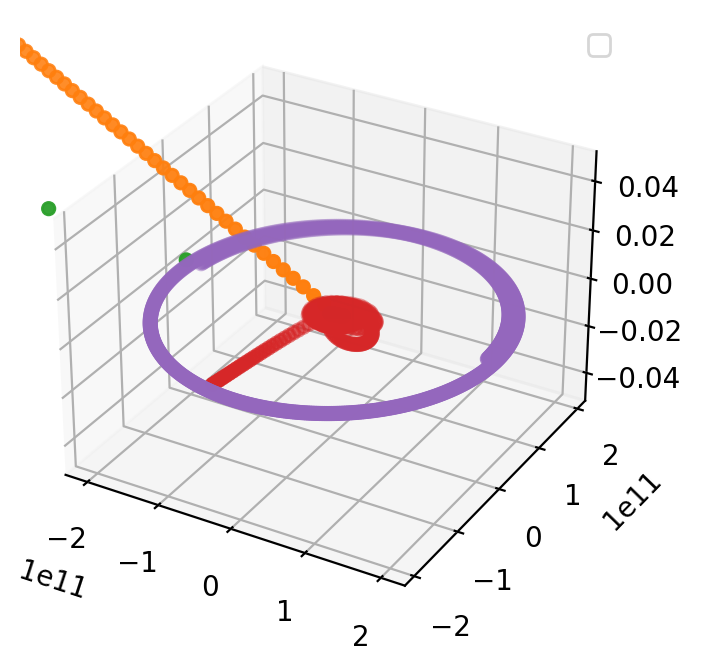

In [9]:
G = 6.67*(10**-11) #gravitational cst [(m^3)(kg^-1)(s^-2)]
def period(a, M_1, m_2): 
    #Function to calculate the orbital period of one of the bodies if necessary
    global G
    P = ((4*(np.pi**2)*(a**3))/(G*(M_1+m_2)))**0.5
    return P
#defining the simulation run-time and the number of time steps by the period of the outermost-body
N = 500 #number of timesteps
dt = period(bodies['Position'][4][0], bodies['Mass'][0], bodies['Mass'][4])/N
t = 0
tMax = period(bodies['Position'][4][0], bodies['Mass'][0], bodies['Mass'][4])*1.5

#Define empty position arrays for potential bodies
t = 0
x1t = []
y1t = []
z1t = []
x2t = []
y2t = []
z2t = []
x3t = []
y3t = []
z3t = []
x4t = []
y4t = []
z4t = []
x5t = []
y5t = []
z5t = []
x6t = []
y6t = []
z6t = []
x7t = []
y7t = []
z7t = []
x8t = []
y8t = []
z8t = []
x9t = []
y9t = []
z9t = []

fig = plt.figure(dpi=200)
#write simulation to an mp4 video
with writer.saving(fig, "WASP-test.mp4", dpi=200): #Make sure to change the name of your sim
    while (t<tMax):
        if len(y) == 12:
            #pull out postion and velocity
            r1 = y[0:3]
            r2 = y[3:6]
            v1 = y[6:9]
            v2 = y[9:12]
            
            #Define Position Coordinates
            x1t.append(r1[0])
            y1t.append(r1[1])
            z1t.append(r1[2])
            x2t.append(r2[0])
            y2t.append(r2[1])
            z2t.append(r2[2])
            
            #Plot position coordinates at current time-step
            ax = plt.axes(projection='3d')
            ax.scatter3D(x1t,y1t,z1t, label ='')
            ax.scatter3D(x2t,y2t,z2t, label ='')
            ax.set_xlim([-np.max(x2t),np.max(x2t)])
            ax.set_ylim([-np.max(y2t),np.max(y2t)])
            ax.set_zlim([-np.max(z2t),np.max(z2t)])
            ax.legend()
            
            #Update Position/Velocity Array
            y =  time_step_movement(dt, y)
            #Proceed to next time-step in the loop
            t = t + dt
            writer.grab_frame()
            
        elif len(y) == 18:
            #pull out postion and velocity
            r1 = y[0:3]
            r2 = y[3:6]
            r3 = y[6:9]
            v1 = y[9:12]
            v2 = y[12:15]
            v3 = y[15:18]
            
            #Define Position Coordinates
            x1t.append(r1[0])
            y1t.append(r1[1])
            z1t.append(r1[2])
            x2t.append(r2[0])
            y2t.append(r2[1])
            z2t.append(r2[2])
            x3t.append(r3[0])
            y3t.append(r3[1])
            z3t.append(r3[2])
             
            #Plot position coordinates at current time-step
            ax = plt.axes(projection='3d')
            ax.scatter3D(x1t,y1t,z1t, label ='Kepler-36')
            ax.scatter3D(x2t,y2t,z2t, label ='Kepler-36 a')
            ax.scatter3D(x3t,y3t,z3t, label ='Kepler-36 b')
            ax.set_xlim([-np.max(x3t),np.max(x3t)])
            ax.set_ylim([-np.max(y3t),np.max(y3t)])
            ax.set_zlim([-np.max(z3t),np.max(z3t)])
            ax.legend()
          
            #Update Position/Velocity Array
            y = time_step_movement(dt, y)
            #Proceed to next time-step in the loop
            t = t + dt
            writer.grab_frame()
        elif len(y) == 24:
            #pull out postion and velocity
            r1 = y[0:3]
            r2 = y[3:6]
            r3 = y[6:9]
            r4 = y[9:12]
            v1 = y[12:15]
            v2 = y[15:18]
            v3 = y[18:21]
            v4 = y[21:24]
            
            #Define Position Coordinates
            x1t.append(r1[0])
            y1t.append(r1[1])
            z1t.append(r1[2])
            x2t.append(r2[0])
            y2t.append(r2[1])
            z2t.append(r2[2])
            x3t.append(r3[0])
            y3t.append(r3[1])
            z3t.append(r3[2])
            x4t.append(r4[0])
            y4t.append(r4[1])
            z4t.append(r4[2])  

            #Plot position coordinates at current time-step
            ax = plt.axes(projection='3d')
            ax.scatter3D(x1t,y1t,z1t, label ='')
            ax.scatter3D(x2t,y2t,z2t, label ='')
            ax.scatter3D(x3t,y3t,z3t, label ='')
            ax.scatter3D(x4t,y4t,z4t, label ='')
            ax.set_xlim([-np.max(x4t),np.max(x4t)])
            ax.set_ylim([-np.max(y4t),np.max(y4t)])
            ax.set_zlim([-np.max(z4t),np.max(z4t)])
            ax.legend()
           
            #Update Position/Velocity Array
            y = time_step_movement(dt, y)
            #Proceed to next time-step in the loop
            t = t + dt
            writer.grab_frame()
        elif len(y) == 30:
            #pull out postion and velocity
            r1 = y[0:3]
            r2 = y[3:6]
            r3 = y[6:9]
            r4 = y[9:12]
            r5 = y[12:15]
            v1 = y[15:18]
            v2 = y[18:21]
            v3 = y[21:24]
            v4 = y[24:27]
            v5 = y[27:30]
            
            #Define Position Coordinates
            x1t.append(r1[0])
            y1t.append(r1[1])
            z1t.append(r1[2])
            x2t.append(r2[0])
            y2t.append(r2[1])
            z2t.append(r2[2])
            x3t.append(r3[0])
            y3t.append(r3[1])
            z3t.append(r3[2])
            x4t.append(r4[0])
            y4t.append(r4[1])
            z4t.append(r4[2])
            x5t.append(r5[0])
            y5t.append(r5[1])
            z5t.append(r5[2])  

            #Plot position coordinates at current time-step
            ax = plt.axes(projection='3d')
            ax.scatter3D(x1t,y1t,z1t, label ='')
            ax.scatter3D(x2t,y2t,z2t, label ='')
            ax.scatter3D(x3t,y3t,z3t, label ='')
            ax.scatter3D(x4t,y4t,z4t, label ='')
            ax.scatter3D(x5t,y5t,z5t, label ='')
            ax.set_xlim([-np.max(x5t),np.max(x5t)])
            ax.set_ylim([-np.max(y5t),np.max(y5t)])
            ax.set_zlim([-np.max(z5t),np.max(z5t)])
            ax.legend()
            
            #Update Position/Velocity Array
            y = time_step_movement(dt, y)
            #Proceed to next time-step in the loop
            t = t + dt
            writer.grab_frame()
        elif len(y) == 36:
            #pull out postion and velocity
            r1 = y[0:3]
            r2 = y[3:6]
            r3 = y[6:9]
            r4 = y[9:12]
            r5 = y[12:15]
            r6 = y[15:18]
            v1 = y[18:21]
            v2 = y[21:24]
            v3 = y[24:27]
            v4 = y[27:30]
            v5 = y[30:33]
            v6 = y[33:36]
            
            #Define Position Coordinates
            x1t.append(r1[0])
            y1t.append(r1[1])
            z1t.append(r1[2])
            x2t.append(r2[0])
            y2t.append(r2[1])
            z2t.append(r2[2])
            x3t.append(r3[0])
            y3t.append(r3[1])
            z3t.append(r3[2])
            x4t.append(r4[0])
            y4t.append(r4[1])
            z4t.append(r4[2])
            x5t.append(r5[0])
            y5t.append(r5[1])
            z5t.append(r5[2])
            x6t.append(r6[0])
            y6t.append(r6[1])
            z6t.append(r6[2])  
            
            #Plot position coordinates at current time-step
            ax = plt.axes(projection='3d')
            ax.scatter3D(x1t,y1t,z1t, label ='')
            ax.scatter3D(x2t,y2t,z2t, label ='')
            ax.scatter3D(x3t,y3t,z3t, label ='')
            ax.scatter3D(x4t,y4t,z4t, label ='')
            ax.scatter3D(x5t,y5t,z5t, label ='')
            ax.scatter3D(x6t,y6t,z6t, label ='')
            ax.set_xlim([-np.max(x6t),np.max(x6t)])
            ax.set_ylim([-np.max(y6t),np.max(y6t)])
            ax.set_zlim([-np.max(z6t),np.max(z6t)])
            ax.legend()
            
            #Update Position/Velocity Array
            y = time_step_movement(dt, y)
            #Proceed to next time-step in the loop
            t = t + dt
            writer.grab_frame()
        elif len(y) == 42:
            #pull out postion and velocity
            r1 = y[0:3]
            r2 = y[3:6]
            r3 = y[6:9]
            r4 = y[9:12]
            r5 = y[12:15]
            r6 = y[15:18]
            r7 = y[18:21]
            v1 = y[21:24]
            v2 = y[24:27]
            v3 = y[27:30]
            v4 = y[30:33]
            v5 = y[33:36]
            v6 = y[36:39]
            v7 = y[39:42]
        
            #Define Position Coordinates
            x1t.append(r1[0])
            y1t.append(r1[1])
            z1t.append(r1[2])
            x2t.append(r2[0])
            y2t.append(r2[1])
            z2t.append(r2[2])
            x3t.append(r3[0])
            y3t.append(r3[1])
            z3t.append(r3[2])
            x4t.append(r4[0])
            y4t.append(r4[1])
            z4t.append(r4[2])
            x5t.append(r5[0])
            y5t.append(r5[1])
            z5t.append(r5[2])
            x6t.append(r6[0])
            y6t.append(r6[1])
            z6t.append(r6[2])
            x7t.append(r7[0])
            y7t.append(r7[1])
            z7t.append(r7[2])  

            #Plot position coordinates at current time-step
            ax = plt.axes(projection='3d')
            ax.scatter3D(x1t,y1t,z1t, label ='')
            ax.scatter3D(x2t,y2t,z2t, label ='')
            ax.scatter3D(x3t,y3t,z3t, label ='')
            ax.scatter3D(x4t,y4t,z4t, label ='')
            ax.scatter3D(x5t,y5t,z5t, label ='')
            ax.scatter3D(x6t,y6t,z6t, label ='')
            ax.scatter3D(x7t,y7t,z7t, label ='')
            ax.set_xlim([-np.max(x7t),np.max(x7t)])
            ax.set_ylim([-np.max(y7t),np.max(y7t)])
            ax.set_zlim([-np.max(z7t),np.max(z7t)])
            ax.legend()

            #Update Position/Velocity Array
            y = time_step_movement(dt, y)
            #Proceed to next time-step in the loop
            t = t + dt
            writer.grab_frame()
        elif len(y) == 48:
            #pull out postion and velocity
            r1 = y[0:3]
            r2 = y[3:6]
            r3 = y[6:9]
            r4 = y[9:12]
            r5 = y[12:15]
            r6 = y[15:18]
            r7 = y[18:21]
            r8 = y[21:24]
            v1 = y[24:27]
            v2 = y[27:30]
            v3 = y[30:33]
            v4 = y[33:36]
            v5 = y[36:39]
            v6 = y[39:42]
            v7 = y[42:45]
            v8 = y[45:48]
        
            #Define Position Coordinates
            x1t.append(r1[0])
            y1t.append(r1[1])
            z1t.append(r1[2])
            x2t.append(r2[0])
            y2t.append(r2[1])
            z2t.append(r2[2])
            x3t.append(r3[0])
            y3t.append(r3[1])
            z3t.append(r3[2])
            x4t.append(r4[0])
            y4t.append(r4[1])
            z4t.append(r4[2])
            x5t.append(r5[0])
            y5t.append(r5[1])
            z5t.append(r5[2])
            x6t.append(r6[0])
            y6t.append(r6[1])
            z6t.append(r6[2])
            x7t.append(r7[0])
            y7t.append(r7[1])
            z7t.append(r7[2])
            x8t.append(r8[0])
            y8t.append(r8[1])
            z8t.append(r8[2]) 

            #Plot position coordinates at current time-step
            ax = plt.axes(projection='3d')
            ax.scatter3D(x1t,y1t,z1t, label ='Trappist-1')
            ax.scatter3D(x2t,y2t,z2t, label ='Trappist-1 b')
            ax.scatter3D(x3t,y3t,z3t, label ='Trappist-1 c')
            ax.scatter3D(x4t,y4t,z4t, label ='Trappist-1 d')
            ax.scatter3D(x5t,y5t,z5t, label ='Trappist-1 e')
            ax.scatter3D(x6t,y6t,z6t, label ='Trappist-1 f')
            ax.scatter3D(x7t,y7t,z7t, label ='Trappist-1 g')
            ax.scatter3D(x8t,y8t,z8t, label ='Trappist-1 h')
            ax.set_xlim([-np.max(x8t),np.max(x8t)])
            ax.set_ylim([-np.max(y8t),np.max(y8t)])
            ax.set_zlim([-np.max(z8t),np.max(z8t)])
            ax.legend()
      
            #Update Position/Velocity Array
            y = time_step_movement(dt, y)
            #Proceed to next time-step in the loop
            t = t + dt
            writer.grab_frame()
        elif len(y) == 54:
            #pull out postion and velocity
            r1 = y[0:3]
            r2 = y[3:6]
            r3 = y[6:9]
            r4 = y[9:12]
            r5 = y[12:15]
            r6 = y[15:18]
            r7 = y[18:21]
            r8 = y[21:24]
            r9 = y[24:27]
            v1 = y[27:30]
            v2 = y[30:33]
            v3 = y[33:36]
            v4 = y[36:39]
            v5 = y[39:42]
            v6 = y[42:45]
            v7 = y[45:48]
            v8 = y[48:51]
            v9 = y[51:54]
        
            #Define Position Coordinates
            x1t.append(r1[0])
            y1t.append(r1[1])
            z1t.append(r1[2])
            x2t.append(r2[0])
            y2t.append(r2[1])
            z2t.append(r2[2])
            x3t.append(r3[0])
            y3t.append(r3[1])
            z3t.append(r3[2])
            x4t.append(r4[0])
            y4t.append(r4[1])
            z4t.append(r4[2])
            x5t.append(r5[0])
            y5t.append(r5[1])
            z5t.append(r5[2])
            x6t.append(r6[0])
            y6t.append(r6[1])
            z6t.append(r6[2])
            x7t.append(r7[0])
            y7t.append(r7[1])
            z7t.append(r7[2])
            x8t.append(r8[0])
            y8t.append(r8[1])
            z8t.append(r8[2])
            x9t.append(r9[0])
            y9t.append(r9[1])
            z9t.append(r9[2])  

            #Plot position coordinates at current time-step
            ax = plt.axes(projection='3d')
            ax.scatter3D(x1t,y1t,z1t, label ='')
            ax.scatter3D(x2t,y2t,z2t, label ='')
            ax.scatter3D(x3t,y3t,z3t, label ='')
            ax.scatter3D(x4t,y4t,z4t, label ='')
            ax.scatter3D(x5t,y5t,z5t, label ='')
            ax.scatter3D(x6t,y6t,z6t, label ='')
            ax.scatter3D(x7t,y7t,z7t, label ='')
            ax.scatter3D(x8t,y8t,z8t, label ='')
            ax.scatter3D(x9t,y9t,z9t, label ='')
            ax.set_xlim([-np.max(x9t),np.max(x9t)])
            ax.set_ylim([-np.max(y9t),np.max(y9t)])
            ax.set_zlim([-np.max(z9t),np.max(z9t)])
            ax.legend()
           
            #Update Position/Velocity Array
            y = time_step_movement(dt, y)
            #Proceed to next time-step in the loop
            t = t + dt
            writer.grab_frame()

In [ ]:
#look into conservation, know relative velocities, switch to center of mass reference frame